In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets.xlsx
/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets.arff


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif


In [3]:
!pip install openpyxl
data = pd.read_excel('/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets.xlsx',engine="openpyxl")

In [4]:
data.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


In [6]:
data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [7]:
clean_nums = {"Class":     {"DOKOL": 0, "SAFAVI": 1,"ROTANA":2, "DEGLET":3, "SOGAY":4, "IRAQI": 5, "BERHI": 6}}
data = data.replace(clean_nums)

In [8]:
data.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [9]:
data['Class'].value_counts()

0    204
1    199
2    166
3     98
4     94
5     72
6     65
Name: Class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Variable')

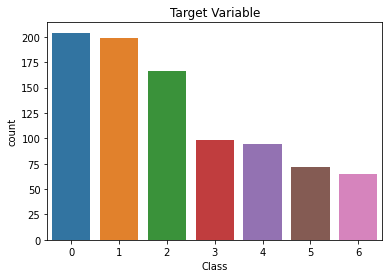

In [10]:
sns.countplot(data.Class)
plt.title('Target Variable')


this shows little imbalance in dataset..

In [11]:
data[data.columns[1:]].corr()['Class'].sort_values(ascending=False)

Class            1.000000
MINOR_AXIS       0.678247
EQDIASQ          0.576001
CONVEX_AREA      0.567079
SHAPEFACTOR_3    0.530223
COMPACTNESS      0.492467
PERIMETER        0.465785
SkewRB           0.442558
ROUNDNESS        0.401775
MAJOR_AXIS       0.372346
KurtosisRB       0.361317
StdDevRB         0.267291
EXTENT           0.193297
SOLIDITY         0.108528
SkewRG           0.088541
StdDevRG         0.080683
StdDevRR         0.033531
SkewRR           0.025302
MeanRR          -0.022288
ALLdaub4RR      -0.022292
ASPECT_RATIO    -0.027140
KurtosisRG      -0.029077
SHAPEFACTOR_1   -0.042773
SHAPEFACTOR_4   -0.045998
MeanRG          -0.080748
ALLdaub4RG      -0.080758
KurtosisRR      -0.093588
MeanRB          -0.142079
ALLdaub4RB      -0.142096
EntropyRG       -0.313224
EntropyRR       -0.317146
EntropyRB       -0.324570
SHAPEFACTOR_2   -0.424335
ECCENTRICITY    -0.567184
Name: Class, dtype: float64

**Checking correlation wrt Class**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution')

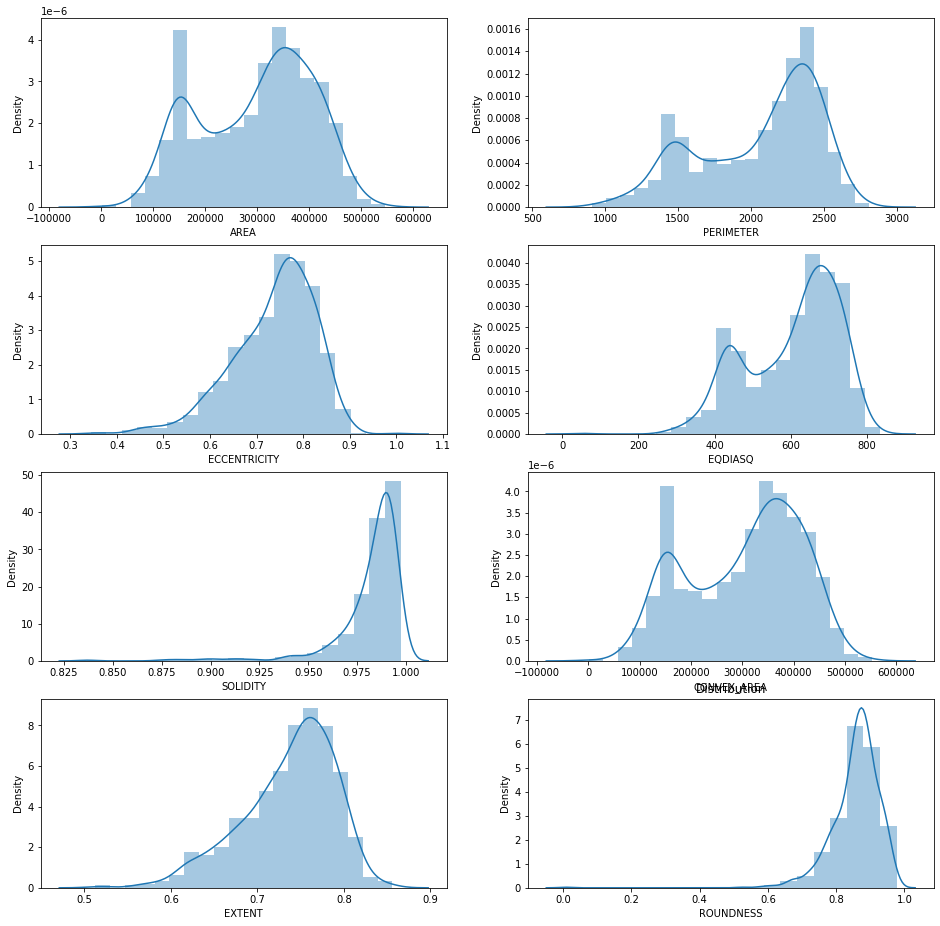

In [12]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.AREA, bins = 20, ax=ax[0,0]) 
sns.distplot(data.PERIMETER, bins = 20, ax=ax[0,1]) 
sns.distplot(data.ECCENTRICITY, bins = 20, ax=ax[1,0]) 
sns.distplot(data.EQDIASQ, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SOLIDITY, bins = 20, ax=ax[2,0])
sns.distplot(data.CONVEX_AREA, bins = 20, ax=ax[2,1])
sns.distplot(data.EXTENT, bins = 20, ax=ax[3,0]) 
sns.distplot(data.ROUNDNESS, bins = 20, ax=ax[3,1]) 
plt.title('Distribution')

**Distribituon plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

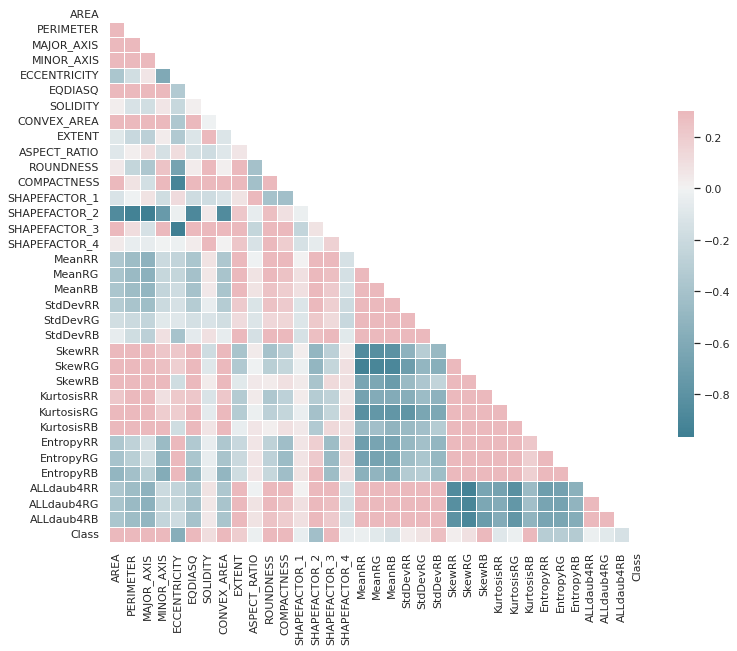

In [13]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression,SelectKBest,SelectPercentile

In [15]:
#Defyning X and y
x = data.drop(['Class'], axis=1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)

In [16]:
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((718, 34), (180, 34), (718,), (180,))

In [18]:
def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

In [19]:
import warnings
warnings.filterwarnings("ignore")
#logestic regression
# Create regularization penalty space
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
FitModel(x_train,y_train,'LogisticRegression_norm',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[1 2 0 0 0 6 2 4 5 0 2 2 0 3 1 2 1 2 2 0 2 6 5 2 5 1 5 0 1 5 0 2 2 5 2 1 4
 0 6 6 3 1 0 3 0 3 4 0 6 1 2 4 0 2 5 3 4 2 1 0 0 0 4 1 0 2 0 1 0 6 5 0 0 1
 2 2 2 1 5 5 1 2 3 4 0 3 4 0 0 2 4 0 4 3 1 0 1 2 1 1 4 2 0 1 6 1 1 1 2 0 1
 1 1 0 1 3 0 1 4 3 1 4 5 5 0 1 2 0 4 1 3 0 3 1 1 3 2 6 2 2 0 2 5 1]
Best Params : {'C': 1.0, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.97      1.00      0.98        32
           2       0.93      0.96      0.95        28
           3       0.77      0.67      0.71        15
           4       0.71      0.91      0.80        11
           5       1.00      1.00      1.00        13
           6       1.00      0.80      0.89        10

    accuracy                           0.92       144
   macro avg       0.91      0.90      0.90       144
weighted avg       0.93      0.92    

In [20]:
#RANDOM FOREST
param ={
            'n_estimators': [100 , 300 , 500 ],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
FitModel(x_train,y_train,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[1 4 0 0 0 6 2 4 5 0 2 2 0 3 1 2 1 2 2 0 2 6 5 2 5 4 5 0 1 5 0 2 2 5 2 1 4
 0 6 6 4 1 0 3 0 3 4 3 6 1 2 3 0 2 5 3 4 2 1 0 0 0 4 1 0 2 0 1 0 6 5 0 0 1
 2 2 2 1 5 6 1 2 3 4 0 3 4 0 0 2 4 0 4 3 1 3 1 2 1 1 4 2 0 1 6 1 1 1 2 0 1
 1 1 0 1 3 0 1 4 3 1 4 6 5 0 1 2 0 4 1 3 0 3 1 1 3 2 6 4 2 0 2 5 1]
Best Params : {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.97      0.89      0.93        35
           1       1.00      1.00      1.00        32
           2       0.96      0.93      0.95        28
           3       0.67      0.67      0.67        15
           4       0.53      0.82      0.64        11
           5       1.00      0.85      0.92        13
           6       0.80      0.80      0.80        10

    accuracy                           0.88       144
   macro avg       0.85      0.85   

In [21]:
#SVC
from sklearn.svm import SVC
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005],
            'kernel':['rbf']
        }
FitModel(x_train,y_train,'SVC_norm',SVC(),param,cv=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[1 3 0 0 0 6 2 4 5 0 2 2 0 3 1 2 1 2 2 0 2 6 5 2 5 1 5 0 1 5 0 2 2 5 2 1 4
 0 6 6 3 1 0 3 0 3 4 3 6 1 2 4 0 2 5 3 4 2 1 0 0 0 4 1 0 2 0 1 0 6 5 0 0 1
 2 2 2 1 5 6 1 2 3 4 0 3 4 0 0 2 4 0 3 3 1 3 1 2 1 1 4 2 0 1 6 1 1 1 2 0 1
 1 1 0 1 3 0 1 4 0 1 4 5 5 0 1 2 0 4 1 3 0 3 1 1 3 2 6 3 2 0 2 5 1]
Best Params : {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.97      1.00      0.98        32
           2       0.96      0.93      0.95        28
           3       0.59      0.67      0.62        15
           4       0.77      0.91      0.83        11
           5       1.00      0.92      0.96        13
           6       0.89      0.80      0.84        10

    accuracy                           0.90       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.9

In [22]:
#the best performance is log regression 
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [24]:
#Select best feature 
rfe = RFE(clf, n_features_to_select= None)
rfe = rfe.fit(x_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
feature=x.columns[rfe.get_support()]
len(feature)

[ True  True  True  True False  True False  True False False  True False
 False False  True False False False False  True  True  True  True False
  True False  True  True False  True False  True False False]
[ 1  1  1  1 11  1 10  1 13 16  1  4 18  9  1 17  7 12  3  1  1  1  1  5
  1  6  1  1  2  1 14  1  8 15]


17

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [25]:
x.columns[rfe.support_]

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'EQDIASQ',
       'CONVEX_AREA', 'ROUNDNESS', 'SHAPEFACTOR_3', 'StdDevRR', 'StdDevRG',
       'StdDevRB', 'SkewRR', 'SkewRB', 'KurtosisRG', 'KurtosisRB', 'EntropyRG',
       'ALLdaub4RR'],
      dtype='object')

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sbs=SFS(clf,
        k_features=10, 
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=4,
        n_jobs=-1
       ).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    2.0s finished

[2022-03-06 17:27:46] Features: 1/10 -- score: 0.6225170701427685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.2s finished

[2022-03-06 17:27:47] Features: 2/10 -- score: 0.8342023587833645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.2s finished

[2022-03-06 17:27:48] Features: 3/10 -- score: 0.8745965238981998[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.2s finished

[2022-03-06 17:27:49] Features: 4/10 -- score: 0.8941185599006827[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

In [32]:
sbs.k_feature_idx_

(2, 3, 10, 18, 19, 20, 21, 23, 24, 27)

In [34]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.6444444444444445, 0.6333333333333333, 0.608...",0.622517,"(3,)",0.027174,0.016952,0.009787
2,"(3, 23)","[0.8666666666666667, 0.8444444444444444, 0.815...",0.834202,"(3, 23)",0.036609,0.022838,0.013186
3,"(3, 23, 24)","[0.9, 0.8888888888888888, 0.8715083798882681, ...",0.874597,"(3, 23, 24)",0.037587,0.023448,0.013538
4,"(3, 10, 23, 24)","[0.9111111111111111, 0.9, 0.8938547486033519, ...",0.894119,"(3, 10, 23, 24)",0.023155,0.014445,0.00834
5,"(3, 10, 20, 23, 24)","[0.9166666666666666, 0.9, 0.9050279329608939, ...",0.903887,"(3, 10, 20, 23, 24)",0.013421,0.008372,0.004834
6,"(3, 10, 19, 20, 23, 24)","[0.9055555555555556, 0.9222222222222223, 0.910...",0.909458,"(3, 10, 19, 20, 23, 24)",0.013407,0.008364,0.004829
7,"(3, 10, 19, 20, 23, 24, 27)","[0.9222222222222223, 0.9333333333333333, 0.910...",0.916403,"(3, 10, 19, 20, 23, 24, 27)",0.020303,0.012666,0.007313
8,"(3, 10, 18, 19, 20, 23, 24, 27)","[0.9277777777777778, 0.9222222222222223, 0.927...",0.916411,"(3, 10, 18, 19, 20, 23, 24, 27)",0.026281,0.016395,0.009466
9,"(3, 10, 18, 19, 20, 21, 23, 24, 27)","[0.9333333333333333, 0.9444444444444444, 0.921...",0.926148,"(3, 10, 18, 19, 20, 21, 23, 24, 27)",0.023387,0.01459,0.008423
10,"(2, 3, 10, 18, 19, 20, 21, 23, 24, 27)","[0.95, 0.9388888888888889, 0.9162011173184358,...",0.933116,"(2, 3, 10, 18, 19, 20, 21, 23, 24, 27)",0.020236,0.012624,0.007289


'AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],

In [49]:
data2=data[['MAJOR_AXIS', 'MINOR_AXIS',
       'ROUNDNESS', 'MeanRB','StdDevRR', 'StdDevRG','StdDevRB', 'SkewRG','SkewRB',
        'KurtosisRB','Class']]
x = data2.drop(['Class'], axis=1)
y = data2['Class']

In [50]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)
sc = StandardScaler()
x_train_1= sc.fit_transform(x_train_1)
x_test_1=sc.transform(x_test_1)

In [51]:
#the best performance is log regression 
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train_1, y_train_1)

LogisticRegression(random_state=0)

In [52]:
pred = clf.predict(x_test_1)
cm = confusion_matrix(y_test_1, pred)
print(cm)
print(accuracy_score(y_test_1,pred))

[[39  0  0  2  0  0  0]
 [ 0 38  1  0  1  0  0]
 [ 0  0 32  0  1  0  0]
 [ 4  0  0 14  2  0  0]
 [ 0  1  1  5 12  0  0]
 [ 0  0  0  0  0 13  1]
 [ 0  0  0  0  0  1 12]]
0.8888888888888888
